# Modélisation de l’incertitude — Master 2 MIAGE IA2
## Travaux dirigés N◦ 6 : Logique floue

### 1. Introduction
* La bibliothèque Python skfuzzy peut être installée avec la commande
* pip install -U scikit-fuzzy
* Lisez le guide utilisateur sur la page Web de skfuzzy pour vous familiariser avec cette bibliothèque, dont l’utilisation est assez intuitive.


### 2. Système d’inférence flou de Mamdani

* La forme générale d’une règle d’un système d’inférence flou de type Mamdani à p entrées, **x1,x2,...,xp** ∈ **X1 ×X2 ×...×Xp**, et une sortie, **y ∈ Y** , et contenant M règles, est la suivante :
* **Rl : SI x1 est Fl1 ET ... ET xp est Flp ALORS y est Gl**
* où Fli (i = 1,...,p) sont les ensembles flous (valeurs linguistiques) des prémisses, qui sont représentés par leurs fonctions d’appartenance, 
* **μFli** , **Gl** est l’ensemble flou de la conclusion, représenté par sa fonction d’appartenance **μGl (l = 1,...,M)**.
* Une conséquence importante du fait que les règles d’une base sont disjonctives est que :
    * si présent dans la prémisse d’une règle, le connecteur logique de disjonction “OU” peut être éliminé en remplaçant la règle en question avec des nouvelles règles, une pour chaque disjoint de la prémisse, toutes avec le même conséquent (partie ALORS). 
    * Par exemple,
        * R : SI truc OU muche ALORS machin est équivalente à
        * R′: SI truc ALORS machin
        * R′′: SI muche ALORS machin.
* Une base de règles où les prémisses ne contiennent pas de connecteurs “OU” est dite en forme normale.


### 3. Consignes
* Soit un système flou conçu pour l’évaluation d’un rapport de stage, qui prend en entrée trois variables :
- Résultats obtenus (sur 20), (**x1**)
- Méthodes utilisées (sur 20), (**x2**)
- Présentation (sur 20), (**x3**)
- et renvoie l’évaluation globale du rapport (sur 20). (**y**)

* Pour chaque variable d’entrée (**xp** p ∈ {1,2,3}), on va définir trois valeurs linguistiques :
    - Médiocre, 
    - Moyen, 
    - Excellent.

* Pour l’évaluation globale (**y**), par contre, on va définir cinq valeurs linguistiques :
    - Médiocre,
    - Mauvais, 
    - Moyen, 
    - Bon, 
    - Excellent


* La base de règle sera constituée des six règles suivantes :
    - R1 : Si **Résultat est Moyen ET Méthodes est Médiocre** ALORS **Evaluation est Mauvais**
    - R2 : : Si **Résultat est Moyen ET Méthodes est Excellent** ALORS **Evaluation est Bon**
    - R3 : : Si **Résultat est Médiocre ET Méthodes est Moyen** ALORS **Evaluation est Mauvais**
    - R4 : : Si **Résultat est Excellent ET Méthodes est Excellent ET Présentation est Excellent** ALORS **Evaluation est Excellent**
    - R5 : : Si **Résultat est Médiocre OU Méthodes est Moyen** ALORS **Evaluation est Moyen**
    - R6 : : Si **Résultat est Moyen OU Méthodes est Médiocre** ALORS **Evaluation est Médiocre**

#### 1. Définissez les fonctions d’appartenance de valeurs linguistiques pour chaque variable.

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
x_res = ctrl.Antecedent(np.arange(0, 21, 1), 'resultat')
x_method = ctrl.Antecedent(np.arange(0, 21, 1), 'methode')
x_pres = ctrl.Antecedent(np.arange(0, 21, 1), 'presentation')
y_eval = ctrl.Consequent(np.arange(0, 21, 1), 'eval globale')

# Auto-membership function population is possible with .automf(3, 5, or 7)
x_res.automf(3)
x_method.automf(3)
x_pres.automf(3)

y_eval.automf(5)


D:\Logiciel\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


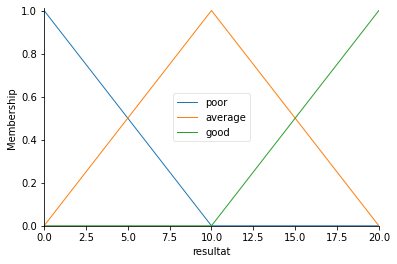

In [9]:
x_res.view()

D:\Logiciel\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


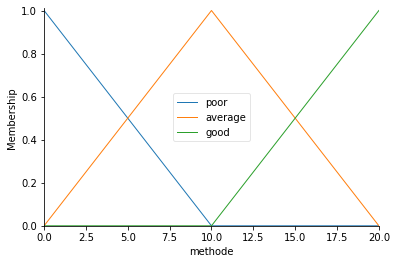

In [10]:
x_method.view()

D:\Logiciel\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


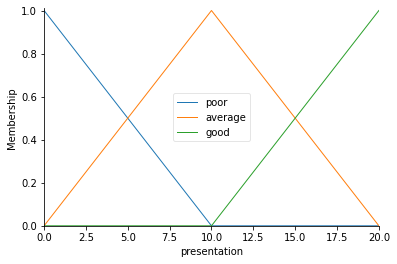

In [11]:
x_pres.view()

D:\Logiciel\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


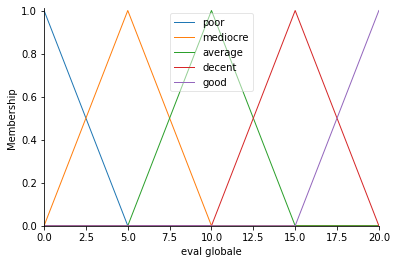

In [12]:
y_eval.view()

#### 2. Transformez la base de règles en forme normale.

* Pour chaque variable d’entrée (**xp** p ∈ {1,2,3}), on va définir trois valeurs linguistiques :
    - Médiocre --> **poor** 
    - Moyen, --> **average**
    - Excellent --> **good**

* Pour l’évaluation globale (**y**), par contre, on va définir cinq valeurs linguistiques :
    - Médiocre,  --> **poor**
    - Mauvais,  --> **mediocre**
    - Moyen,  --> **average**
    - Bon,  --> **decent**
    - Excellent --> **good**

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

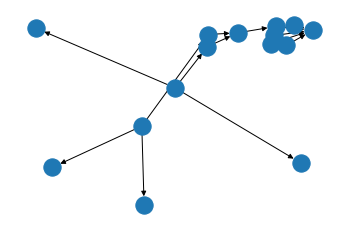

In [13]:
rule1 = ctrl.Rule(x_res['average'] & x_method['poor'], y_eval['mediocre'])  # moyen - médiocre - mauvais
rule2 = ctrl.Rule(x_res['average'] & x_method['good'], y_eval['decent']) # moyen - excellent - bon
rule3 = ctrl.Rule(x_res['poor'] & x_method['average'], y_eval['mediocre']) #mediocre - moyen - mauvais
rule4 = ctrl.Rule(x_res['good'] & x_method['good'] & x_pres['good'], y_eval['good']) # excellent x4
rule5 = ctrl.Rule(x_res['poor'] | x_method['average'], y_eval['average']) # médiocre moyen moyen 
rule6 = ctrl.Rule(x_res['average'] | x_method['poor'], y_eval['poor']) #moyen mediocre mediocre


rule1.view()

#### 3. Réalisez ce système en Python en utilisant la blibliothèque skfuzzy.


In [14]:
stage_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
stage = ctrl.ControlSystemSimulation(stage_ctrl)

#### 4. Soit un rapport de stage avec les notes :
    - Résultats obtenus : 12,
    - Méthodes utilisées : 6,
    - Présentation : 19 ;
appliquez le système pour obtenir l’évaluation globale correspondante.


6.774774774774776


D:\Logiciel\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


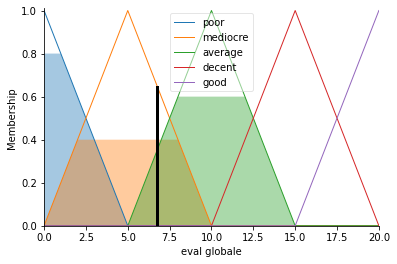

In [16]:
stage.input['resultat'] = 12
stage.input['methode'] = 6
stage.input['presentation'] = 9

# Crunch the numbers
stage.compute()

print(stage.output['eval globale'])
y_eval.view(sim=stage)




#### 5. Que dites-vous de cette base de règles ? Est-elle bien établie ?
#### 6. Essayez des définitions alternatives des valeurs linguistique ; changez la méthode de défuzzification. Que’est-ce que vous pouvez constater ?


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

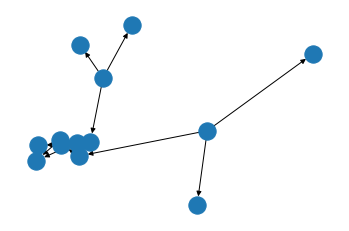

In [17]:

# changements de définition des valeurs linguistiques

x_res = ctrl.Antecedent(np.arange(0, 21, 1), 'resultat')
x_method = ctrl.Antecedent(np.arange(0, 21, 1), 'methode')
x_pres = ctrl.Antecedent(np.arange(0, 21, 1), 'presentation')
y_eval = ctrl.Consequent(np.arange(0, 21, 1), 'eval globale')

# Auto-membership function population is possible with .automf(3, 5, or 7)
x_res.automf(3)
x_method.automf(3)
x_pres.automf(3)

y_eval.automf(3)  #je n'en met que 3 en y_val : good - average - poor

# changements de méthodes de défuzzification
rule1 = ctrl.Rule(x_res['average'] & x_method['poor'], y_eval['poor'])  # moyen - médiocre - médiocre
rule2 = ctrl.Rule(x_res['average'] & x_method['good'], y_eval['good']) # moyen - excellent - bon
rule3 = ctrl.Rule(x_res['poor'] & x_method['average'], y_eval['poor']) #mediocre - moyen - médiocre
rule4 = ctrl.Rule(x_res['good'] & x_method['good'] & x_pres['good'], y_eval['good']) # excellent x4
rule5 = ctrl.Rule(x_res['poor'] | x_method['average'], y_eval['average']) # médiocre moyen moyen 
rule6 = ctrl.Rule(x_res['average'] | x_method['poor'], y_eval['poor']) #moyen mediocre mediocre


rule1.view()

8.227414330218071


D:\Logiciel\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


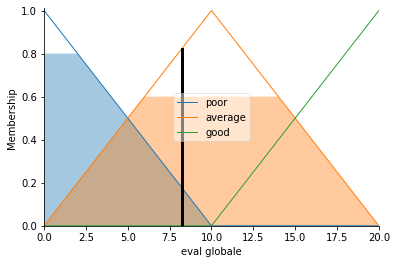

In [19]:
stage_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
stage = ctrl.ControlSystemSimulation(stage_ctrl)

stage.input['resultat'] = 12
stage.input['methode'] = 6
stage.input['presentation'] = 9

# Crunch the numbers
stage.compute()

print(stage.output['eval globale'])
y_eval.view(sim=stage)


Avec moins de variables en conséquence (y -> éval globale) on a une meilleure moyenne. 